#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [4]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [15]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [17]:
model.add(Dense(10, activation='softmax'))

In [18]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [19]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 77s 2ms/step - loss: 2.1649 - acc: 0.1980 - val_loss: 2.0503 - val_acc: 0.2957
Epoch 2/12
37500/37500 [==============================] - 83s 2ms/step - loss: 1.9548 - acc: 0.2961 - val_loss: 1.9340 - val_acc: 0.3464
Epoch 3/12
37500/37500 [==============================] - 74s 2ms/step - loss: 1.8338 - acc: 0.3462 - val_loss: 1.8409 - val_acc: 0.3806
Epoch 4/12
37500/37500 [==============================] - 76s 2ms/step - loss: 1.7306 - acc: 0.3811 - val_loss: 1.7474 - val_acc: 0.4178
Epoch 5/12
37500/37500 [==============================] - 74s 2ms/step - loss: 1.6500 - acc: 0.4094 - val_loss: 1.6786 - val_acc: 0.4378
Epoch 6/12
37500/37500 [==============================] - 79s 2ms/step - loss: 1.5859 - acc: 0.4312 - val_loss: 1.6485 - val_acc: 0.4508
Epoch 7/12
37500/37500 [========

TypeError: 'History' object is not subscriptable

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

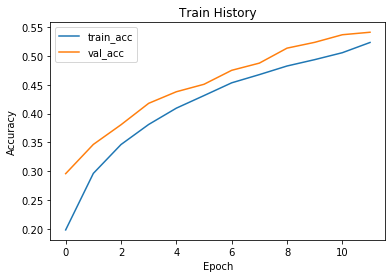

In [29]:
show_train_history('acc','val_acc')

Train on 37500 samples, validate on 12500 samples
Epoch 1/3
37500/37500 [==============================] - 85s 2ms/step - loss: 0.0600 - acc: 0.5385 - val_loss: 0.0625 - val_acc: 0.5505
Epoch 2/3
37500/37500 [==============================] - 82s 2ms/step - loss: 0.0600 - acc: 0.5355 - val_loss: 0.0625 - val_acc: 0.5525
Epoch 3/3
37500/37500 [==============================] - 85s 2ms/step - loss: 0.0600 - acc: 0.5357 - val_loss: 0.0625 - val_acc: 0.5523


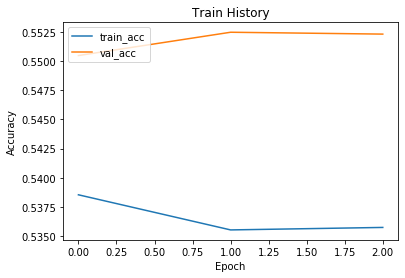

In [33]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=3, batch_size=128, verbose=1)

show_train_history('acc','val_acc')

Train on 37500 samples, validate on 12500 samples
Epoch 1/3
37500/37500 [==============================] - 86s 2ms/step - loss: 0.2031 - acc: 0.9203 - val_loss: 0.2124 - val_acc: 0.9150
Epoch 2/3
37500/37500 [==============================] - 76s 2ms/step - loss: 0.2024 - acc: 0.9206 - val_loss: 0.2121 - val_acc: 0.9156
Epoch 3/3
37500/37500 [==============================] - 74s 2ms/step - loss: 0.2024 - acc: 0.9204 - val_loss: 0.2113 - val_acc: 0.9157


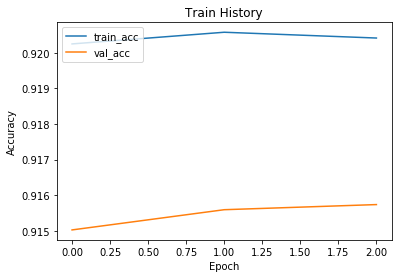

In [34]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=3, batch_size=128, verbose=1)

show_train_history('acc','val_acc')